Fitting 10 folds for each of 270 candidates, totalling 2700 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Confusion Matrix:
[[13307  1315]
 [ 2073  9281]]


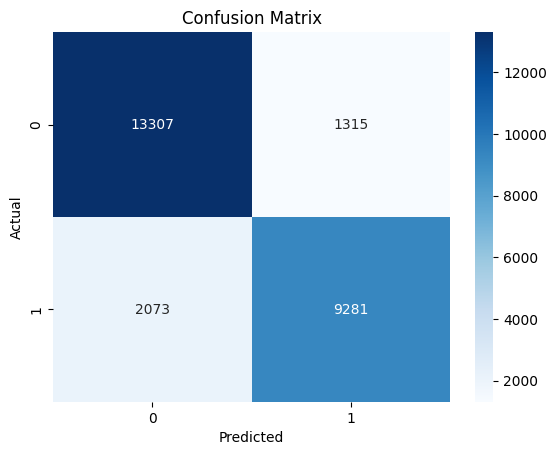

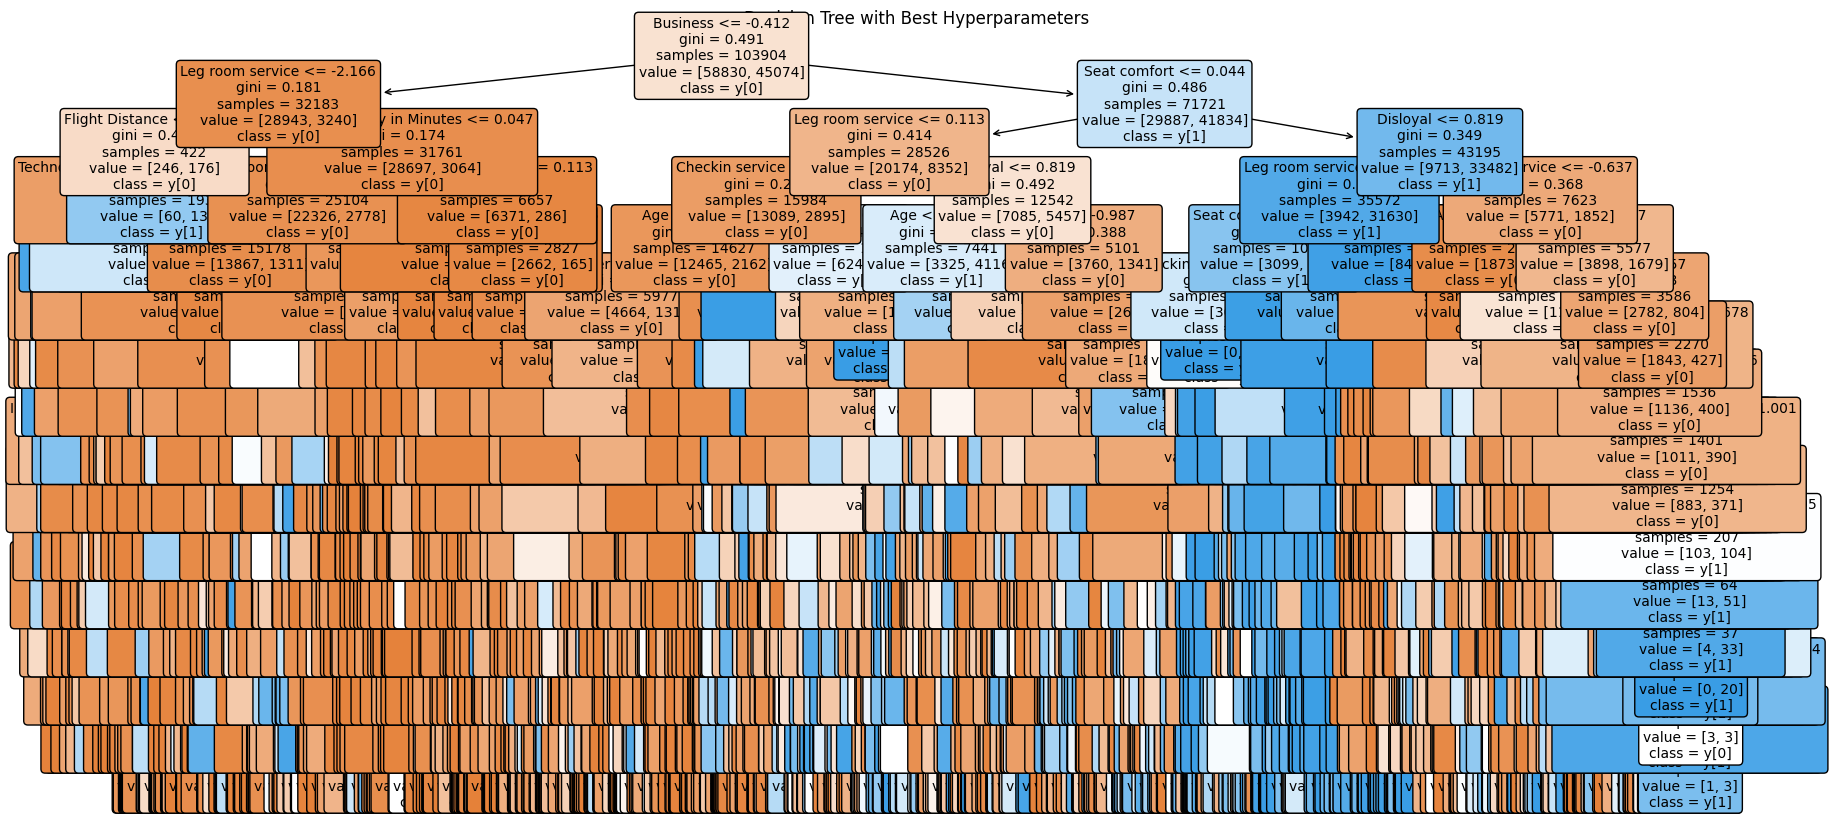

Cross-Validation Scores: [0.87319064 0.8710348  0.87449954 0.87095781 0.87311364 0.87804127
 0.87719433 0.88012011 0.88127502 0.87580844]
Mean Cross-Validation Score: 0.8755235602094242
Accuracy on Test Set: 0.8695719125346474


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("../datasets/train_transformed.csv")

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],        # Split criterion
    'max_depth': [None, 5, 10, 15, 20],      # Tree depth
    'min_samples_split': [2, 4, 6],          # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],           # Minimum samples in a leaf
    'max_features': [None, 'sqrt', 'log2']   # Maximum number of features
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,             # Model
    param_grid=param_grid,     # Hyperparameter grid
    scoring='accuracy',        # Scoring metric
    cv=10,                     # 10-fold cross-validation
    verbose=1,                 # Verbosity for progress messages
    n_jobs=-1                  # Use all available cores
)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best Hyperparameters: {best_params}")

# Make predictions on the test set with the best model
y_pred = best_model.predict(X_test)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot the decision tree with the best model
plt.figure(figsize=(20, 10))  # Adjust the size of the plot
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=True, rounded=True, fontsize=10)
plt.title("Decision Tree with Best Hyperparameters")
plt.show()

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X, y, cv=10)

# Print the performance metrics
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Print additional performance metrics such as accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")
